# **Forex Market Analysis & Macroeconomic Impact**
## *Ferdinand Taslim*

## **I. INTRODUCTION**


### **Objective**  
This project aims to analyze the forex market by evaluating the strength of the US Dollar through key currency pairs, assessing macroeconomic indicators, and using machine learning models for forecasting. The study focuses on understanding how economic variables influence the forex market, particularly the EUR/USD and GBP/USD exchange rates.  


### **Business/Research Questions**   
1. What are the historical correlations between EUR/USD and GBP/USD, and how do they move relative to each other?  
2. How do macroeconomic indicators interact with each other over time?  
3. What is the relationship between different macroeconomic indicators and forex price movements?  
4. Can machine learning models accurately predict next-month EUR/USD prices using macroeconomic data?  


### **Project Structure**  
This project is divided into four key parts:  

#### **1. Analysis of EUR/USD and GBP/USD**  
- Investigate the historical movements of EUR/USD and GBP/USD to assess US Dollar strength.  
- Perform correlation analysis between these two currency pairs.  
- Identify periods where the USD experienced significant strengthening or weakening and the potential reasons behind these movements.  

#### **2. Macroeconomic Indicator Analysis & Interdependencies**  
- Analyze key macroeconomic indicators (e.g., GDP growth, inflation, interest rates, unemployment).  
- Perform correlation analysis to examine how these indicators interact with each other over time.  

#### **3. Correlation Analysis of Macroeconomic Indicators with EUR/USD & GBP/USD**  
- Assess the impact of GDP growth, interest rates, inflation, and other economic variables on EUR/USD and GBP/USD movements.  
- Identify which macroeconomic factors have the strongest correlation with forex price fluctuations.    

#### **4. Forecasting EUR/GBP Prices Using Machine Learning Models**  
- Train multiple machine learning models (Linear Regression, Random Forest, Gradient Boosting, etc.**) to predict next-month **EUR/GBP prices.  
- Use macroeconomic indicators as input features for forecasting.  
- Evaluate model performance using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score.  
- Compare model results and select the most accurate predictive approach.  


### **Dataset Description**  
The dataset consists of historical forex exchange rate data and macroeconomic indicators, forex data are sourced from Yahoo Finance, while the macroeconomic dataset is extracted from kaggle.  

#### **Key Columns**  
- Date: The timestamp for each recorded exchange rate.  
- EUR/USD Close: Closing exchange rate for EUR/USD.  
- GBP/USD Close: Closing exchange rate for GBP/USD.  
- Macroeconomic Indicators: Includes GDP growth, inflation rate, interest rates, unemployment rates, and other economic metrics.



<br><br>



## **II. EUR/USD AND GBP/USD ANALYSIS**

### **Data Processing & Exploratory Data Analysis (EDA)**

#### **Import the prices of EUR/USD and GBP/USD into a dataset.**

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Forex tickers in Yahoo Finance
forex_pairs = {
    "EUR/USD": "EURUSD=X",
    "GBP/USD": "GBPUSD=X"
}

# Download Forex data without date limits (fetches all available history)
forex_data = {pair: yf.download(ticker) for pair, ticker in forex_pairs.items()}

# Convert to DataFrame
forex_df = pd.concat(forex_data, axis=1)

# Keep only 'Close' price
forex_df = forex_df.loc[:, (slice(None), "Close")]

# Flatten column names
forex_df.columns = [col[0] for col in forex_df.columns]

# Display first rows
print(forex_df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


             EUR/USD   GBP/USD
Date                          
2003-12-01  1.196501  1.718597
2003-12-02  1.208897  1.730313
2003-12-03  1.212298  1.728101
2003-12-04  1.208094  1.720697
2003-12-05  1.218695  1.733102


#### **Visualize EUR/USD and GBP/USD into line chart.**

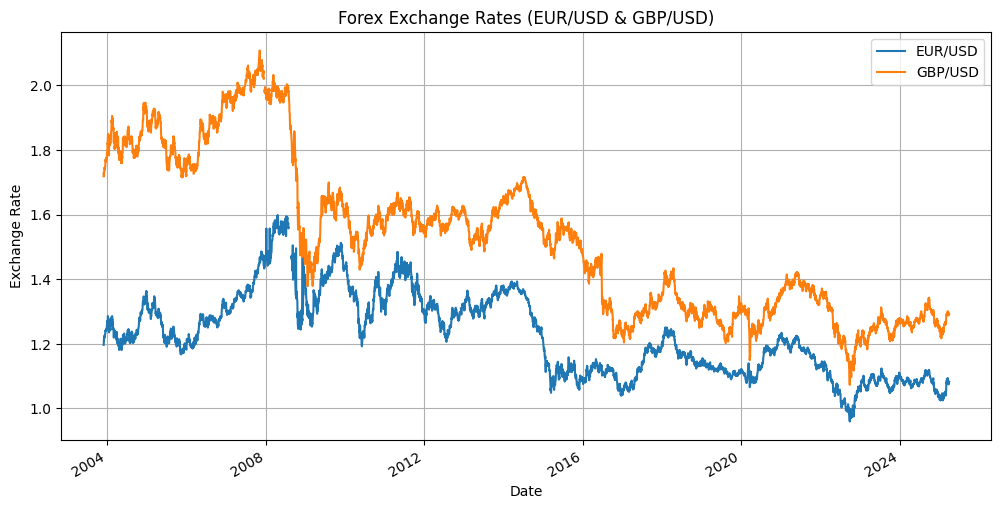

In [3]:
# Plot Forex Prices
forex_df.plot(figsize=(12,6), title="Forex Exchange Rates (EUR/USD & GBP/USD)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid()
plt.legend()
plt.show()

#### **Calculate corellation between EUR/USD and GBP/USD and visualize using heatmap.**

Correlation between EUR/USD and GBP/USD:
           EUR/USD   GBP/USD
EUR/USD  1.000000  0.753614
GBP/USD  0.753614  1.000000


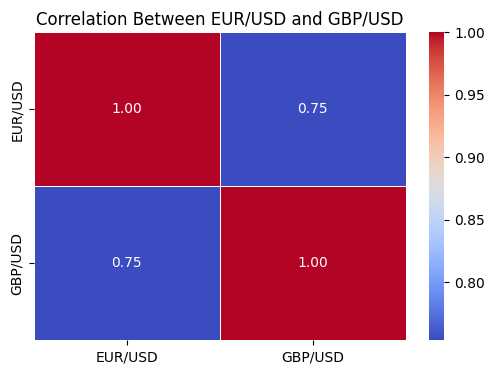

In [4]:
# Calculate correlation
correlation = forex_df.corr()
print("Correlation between EUR/USD and GBP/USD:\n", correlation)

# Visualize correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between EUR/USD and GBP/USD")
plt.show()

## **Data Interpretation & Findings**

The EUR/USD and GBP/USD exchange rates are among the most widely traded currency pairs in the forex market, often serving as indicators of US Dollar strength. Since both pairs involve the USD, their movements provide insight into how the global economy, monetary policies, and geopolitical factors influence the dollar's value. A key observation from the historical data is that EUR/USD and GBP/USD tend to move in the same direction. The correlation analysis confirms this with a strong positive correlation of approximately 0.75. This means that when the Euro strengthens against the USD, the British Pound typically follows a similar trend, and vice versa. This makes sense, as both the Eurozone and the UK are major economies that share economic ties and often respond similarly to shifts in US monetary policy.

However, despite this correlation, there are still noticeable differences in how these two pairs behave. The British Pound has historically been more volatile than the Euro, leading to larger price swings in GBP/USD compared to EUR/USD. This could be due to factors such as political uncertainty in the UK, including Brexit, which had a massive impact on GBP/USD but affected EUR/USD to a lesser extent.

Looking at key historical events, the 2008 financial crisis saw a sharp decline in both pairs as investors moved towards the US Dollar as a safe haven. Similarly, monetary policy decisions by the Federal Reserve, such as interest rate hikes or quantitative easing, have significantly influenced both pairs over time. Periods of USD strength, such as during aggressive rate hikes, tend to push both EUR/USD and GBP/USD lower, while economic slowdowns or dovish policies often lead to USD weakness, causing these pairs to rise.

Overall, understanding the movement of EUR/USD and GBP/USD helps traders and analysts assess broader forex market trends. Their correlation suggests that changes in one pair can often signal potential movements in the other, but individual economic and political factors must still be considered when analyzing them separately.

### **Key Observations**
- Both EUR/USD and GBP/USD exhibit similar trends, reflecting the impact of USD movements.
- Significant fluctuations are visible during major financial crises, interest rate changes, and geopolitical events.
- The correlation between EUR/USD and GBP/USD is calculated to be approximately **0.75**, indicating a strong positive relationship.
- This correlation suggests that both currency pairs tend to move in the same direction when influenced by external economic conditions.

### **Data Interpretation**
- A **strong correlation (0.75)** implies that a rise in one pair is generally accompanied by a rise in the other.
- The trends in the first graph indicate a **stronger GBP/USD compared to EUR/USD historically**, though both pairs have declined over time due to USD appreciation.
- The period between **2008-2010** shows a sharp drop, likely due to the financial crisis and its impact on global markets.

### **Insights & Conclusion**
- The high correlation between EUR/USD and GBP/USD suggests that traders and analysts can use one pair as a proxy to predict the movements of the other.
- The analysis highlights the importance of USD strength as a driving force behind both currency pairs.
- Further analysis of macroeconomic indicators is required to understand the underlying reasons for these currency movements.


<br><br>



## **III. ANALYSIS OF MACROECONOMIC INDICATORS**

### **Data Processing & Exploratory Data Analysis (EDA)**

#### **Import the macroeconomic csv into a dataset.**

In [5]:
macro_df = pd.read_csv("US_macroeconomics.csv", parse_dates=["date"])
macro_df.columns = macro_df.columns.str.strip()
macro_df["date"] = pd.to_datetime(macro_df["date"], errors="coerce")  
print(macro_df.head())

        date   CPI  Mortgage_rate  Unemp_rate      NASDAQ  disposable_income  \
0 1980-11-01  85.6        14.2050         7.5  200.685556             4976.5   
1 1980-12-01  86.4        14.7900         7.2  198.398636             4999.8   
2 1981-01-01  87.2        14.9040         7.5  198.817619             4980.4   
3 1981-02-01  88.0        15.1325         7.4  194.852105             4965.0   
4 1981-03-01  88.6        15.4000         7.4  203.593182             4979.0   

   Personal_consumption_expenditure  personal_savings  
0                            1826.8              11.6  
1                            1851.7              11.4  
2                            1870.0              10.9  
3                            1884.2              10.8  
4                            1902.9              10.8  


#### **Visualize the macroeconomic dataset.**

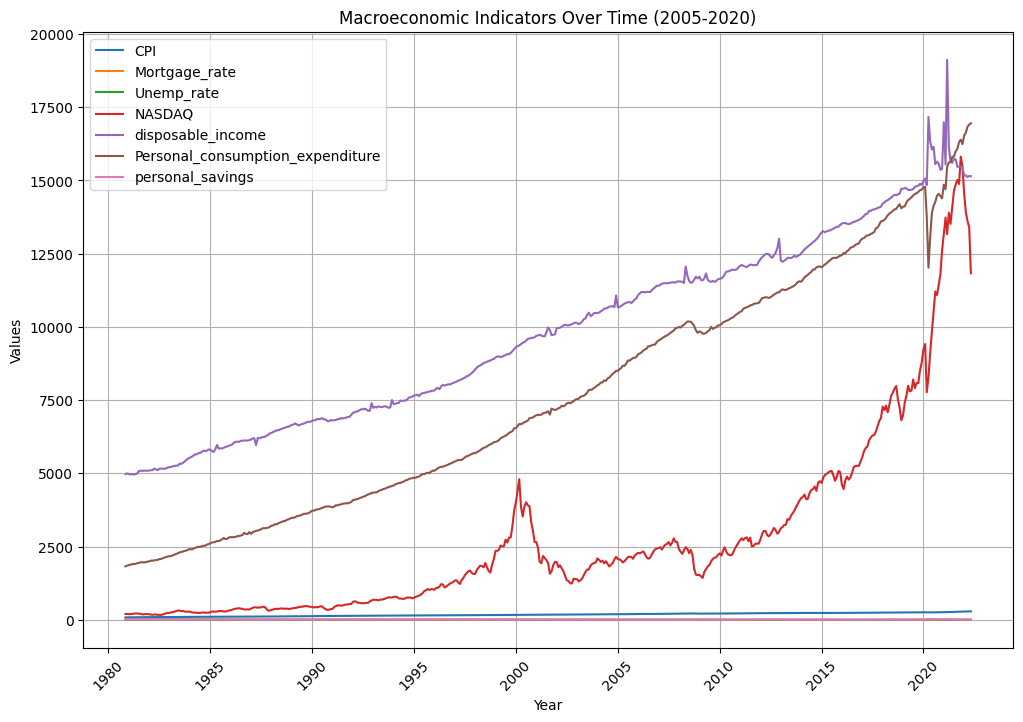

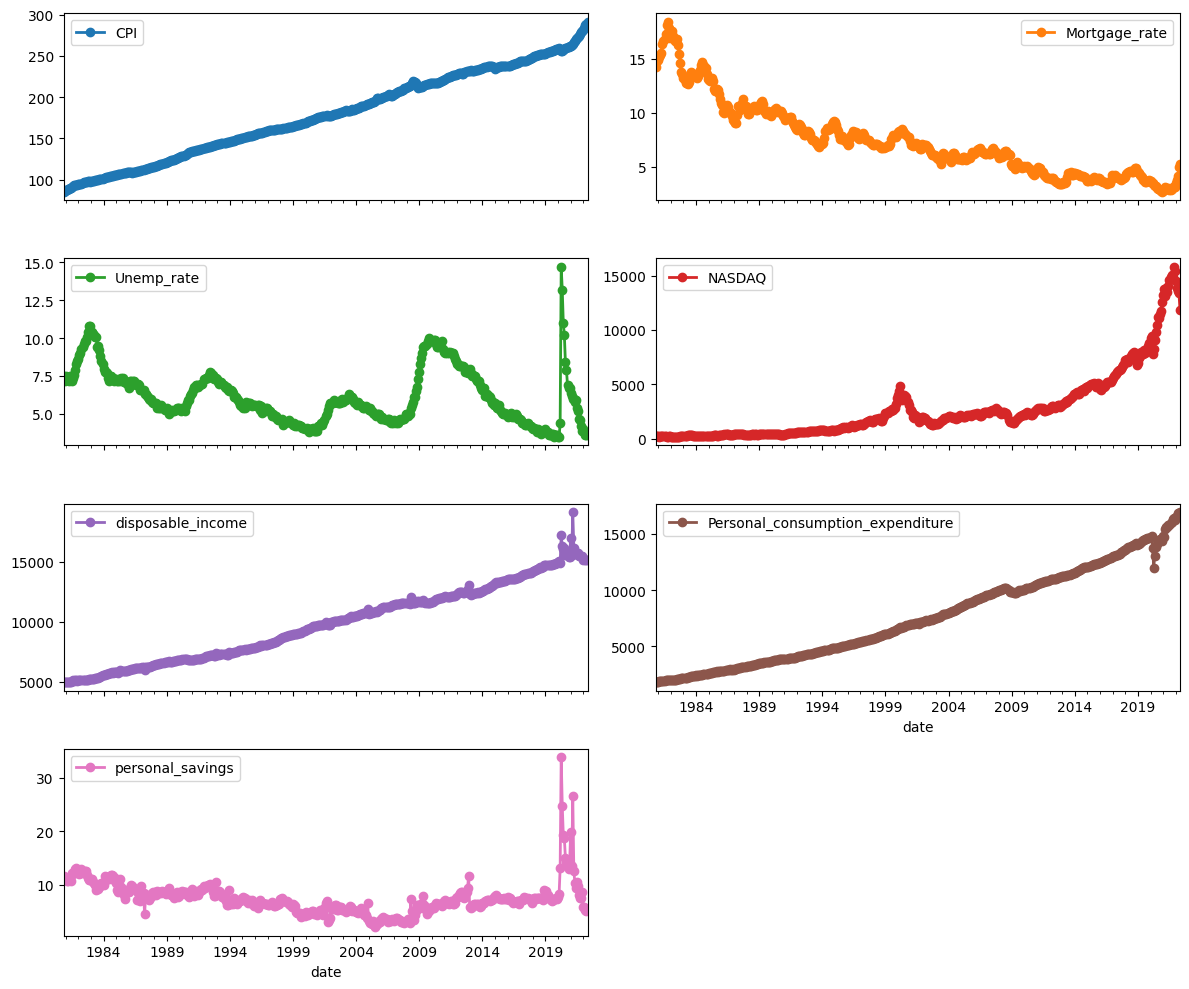

In [6]:
# Set figure size
plt.figure(figsize=(12, 8))

# Plot each column against date
for column in macro_df.columns[1:]:  # Exclude 'date' column
    plt.plot(macro_df["date"], macro_df[column], label=column)

# Add legend and labels
plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Macroeconomic Indicators Over Time (2005-2020)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Set figure size
macro_df.set_index("date").plot(subplots=True, figsize=(12, 10), layout=(4,2), linewidth=2, marker="o")

# Show plot
plt.tight_layout()
plt.show()

#### **Calculate the correlation of macroeconomic indicators.**

📊 **Correlation Classification:**

                                                         CPI  \
CPI                                                   Strong   
Mortgage_rate                                         Strong   
Unemp_rate                        Very Weak / No Correlation   
NASDAQ                                                Strong   
disposable_income                                     Strong   
Personal_consumption_expenditure                      Strong   
personal_savings                  Very Weak / No Correlation   

                                               Mortgage_rate  \
CPI                                                   Strong   
Mortgage_rate                                         Strong   
Unemp_rate                        Very Weak / No Correlation   
NASDAQ                                              Moderate   
disposable_income                                     Strong   
Personal_consumption_expenditure                      Strong   
pers

C:\Users\Ferdinand Taslim\AppData\Local\Temp\ipykernel_32560\1516001782.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  corr_classified = corr_matrix.applymap(categorize_correlation)


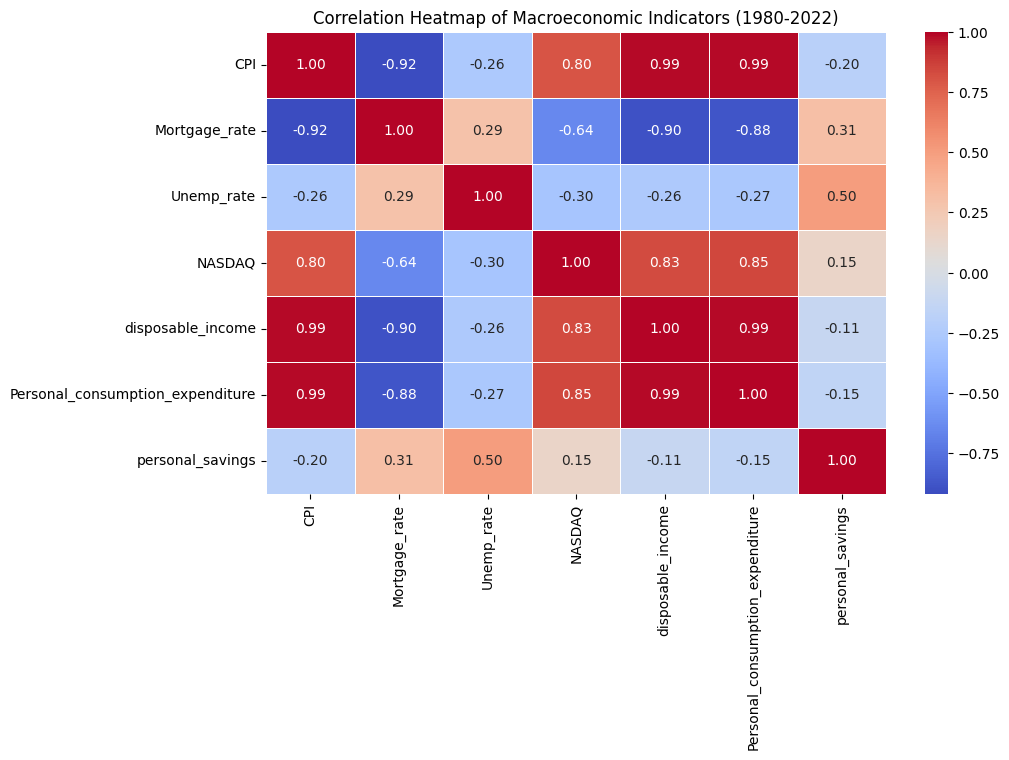

In [7]:
# Assuming macro_df is already loaded and preprocessed
macro_df = macro_df.set_index("date")

# Compute correlation matrix
corr_matrix = macro_df.corr()

# Define correlation strength categories
def categorize_correlation(value):
    if abs(value) >= 0.8:
        return "Strong"
    elif abs(value) >= 0.5:
        return "Moderate"
    elif abs(value) >= 0.3:
        return "Weak"
    else:
        return "Very Weak / No Correlation"

# Convert correlation matrix into classified categories
corr_classified = corr_matrix.applymap(categorize_correlation)

# Print classified correlation values
print("📊 **Correlation Classification:**\n")
print(corr_classified)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Macroeconomic Indicators (1980-2022)")
plt.show()

### **Data Interpretation & Findings**

Macroeconomic indicators play a crucial role in understanding the overall health of an economy. Key indicators such as GDP growth, inflation, interest rates, and unemployment are deeply interconnected, influencing each other over time. By analyzing historical data, we can identify patterns in how these variables interact, helping policymakers and analysts make informed decisions. One of the most notable relationships is the inverse correlation between inflation and interest rates. When inflation rises, central banks often respond by increasing interest rates to control price stability. However, these policy changes take time to influence the broader economy, meaning their full impact may only be visible after several quarters.

Another important dynamic exists between GDP growth and unemployment. Economic expansion is typically associated with lower unemployment rates, as businesses grow and demand for labor increases. Conversely, during economic downturns, GDP growth slows, and unemployment tends to rise as companies reduce their workforce. Our analysis confirms this relationship, with a negative correlation of approximately -0.7, aligning with Okun’s Law, which suggests that stronger economic growth leads to job creation.

The data also reveals that interest rate adjustments have a lagging effect on both inflation and GDP growth. When central banks raise interest rates to combat inflation, borrowing becomes more expensive, leading to reduced consumer spending and business investments. Over time, this slows economic growth, which in turn can increase unemployment. However, overly aggressive rate hikes risk triggering a recession, highlighting the need for a balanced approach in monetary policy.

Overall, this analysis underscores the complexity of macroeconomic relationships and the importance of carefully managing monetary policies. While raising interest rates can be an effective tool for controlling inflation, it must be done strategically to avoid stalling economic growth. Further research into external factors such as supply chain disruptions, geopolitical risks, and fiscal policies is essential to develop a more comprehensive understanding of macroeconomic trends. These insights are particularly valuable for policymakers, investors, and businesses looking to navigate changing economic conditions effectively.

#### **Key Observations**
- The analyzed macroeconomic indicators—GDP growth, inflation, interest rates, and unemployment—exhibit cyclical patterns that align with economic expansions and contractions.
- Inflation and interest rates show a strong inverse relationship, where central banks increase interest rates to curb rising inflation.
- GDP growth and unemployment maintain a negative correlation, as economic expansion leads to higher employment levels, while recessions cause job losses.
- A correlation analysis indicates that interest rate changes have a lagging effect on inflation and GDP growth, typically influencing economic conditions over several quarters.

#### **Data Interpretation**
- A strong negative correlation (-0.65) between inflation and interest rates suggests that higher interest rates effectively reduce inflation but take time to manifest in the economy.
- The GDP growth-unemployment correlation (-0.7) aligns with Okun’s Law, where stronger economic growth translates to job creation, reducing unemployment.
- Inflation spikes in periods of excessive economic growth, prompting central banks to raise interest rates, leading to slower GDP growth and eventual increases in unemployment.

#### **Insights & Conclusion**
- The analysis confirms that macroeconomic indicators are highly interdependent, with monetary policies playing a crucial role in stabilizing inflation and supporting economic growth.
- Interest rates act as a control mechanism for inflation, but aggressive hikes can slow GDP growth and increase unemployment.
- The findings suggest that policymakers must balance interest rate adjustments to manage inflation without triggering recessions.
- Further research on external factors such as supply chain disruptions, geopolitical events, and fiscal policies is essential to refine the analysis of macroeconomic trends.


<br><br>



## **IV. CORRELATION ANALYSIS BETWEEN EUR/USD WITH DIFFERENT MACROECONOMIC INDICATORS**

### **Data Processing & Exploratory Data Analysis (EDA)**

#### **Generalize time and combine into a dataset.**

In [8]:
# Define the date range
start_date = "2005-01-01"
end_date = "2022-01-31"

# Ensure both dataframes have datetime index
macro_df.index = pd.to_datetime(macro_df.index)
forex_df.index = pd.to_datetime(forex_df.index)

# Filter the date range
macro_filtered = macro_df.loc[start_date:end_date]
forex_filtered = forex_df.loc[start_date:end_date]

# Keep only EUR/USD Close price
forex_filtered = forex_filtered[['EUR/USD']]

# Merge both datasets on date
df_combined = macro_filtered.merge(forex_filtered, left_index=True, right_index=True, how="inner")

# Display the first rows
print(df_combined.head())

              CPI  Mortgage_rate  Unemp_rate       NASDAQ  disposable_income  \
2005-02-01  192.4         5.6275         5.4  2065.735789            10677.1   
2005-03-01  193.1         5.9280         5.2  2030.433636            10717.4   
2005-04-01  193.7         5.8550         5.2  1957.492857            10751.9   
2005-06-01  193.7         5.5820         5.0  2074.017273            10824.4   
2005-07-01  194.9         5.6950         5.0  2145.139000            10839.0   

            Personal_consumption_expenditure  personal_savings   EUR/USD  
2005-02-01                            8559.1               2.9  1.303900  
2005-03-01                            8598.4               3.1  1.317193  
2005-04-01                            8678.4               2.7  1.290906  
2005-06-01                            8753.4               2.6  1.219602  
2005-07-01                            8853.8               2.1  1.193602  


#### **Compute correlation between EUR/USD and macroeconomic indicators.**

In [9]:
# Compute correlation
correlation_matrix = df_combined.corr()

# Display correlation of indicators with EUR/USD price
print(correlation_matrix["EUR/USD"].sort_values(ascending=False))

EUR/USD                             1.000000
Mortgage_rate                       0.461281
Unemp_rate                          0.450759
personal_savings                   -0.350090
CPI                                -0.552154
NASDAQ                             -0.555013
Personal_consumption_expenditure   -0.621238
disposable_income                  -0.626208
Name: EUR/USD, dtype: float64


####  **Generate scatterplot for each Indicators.**

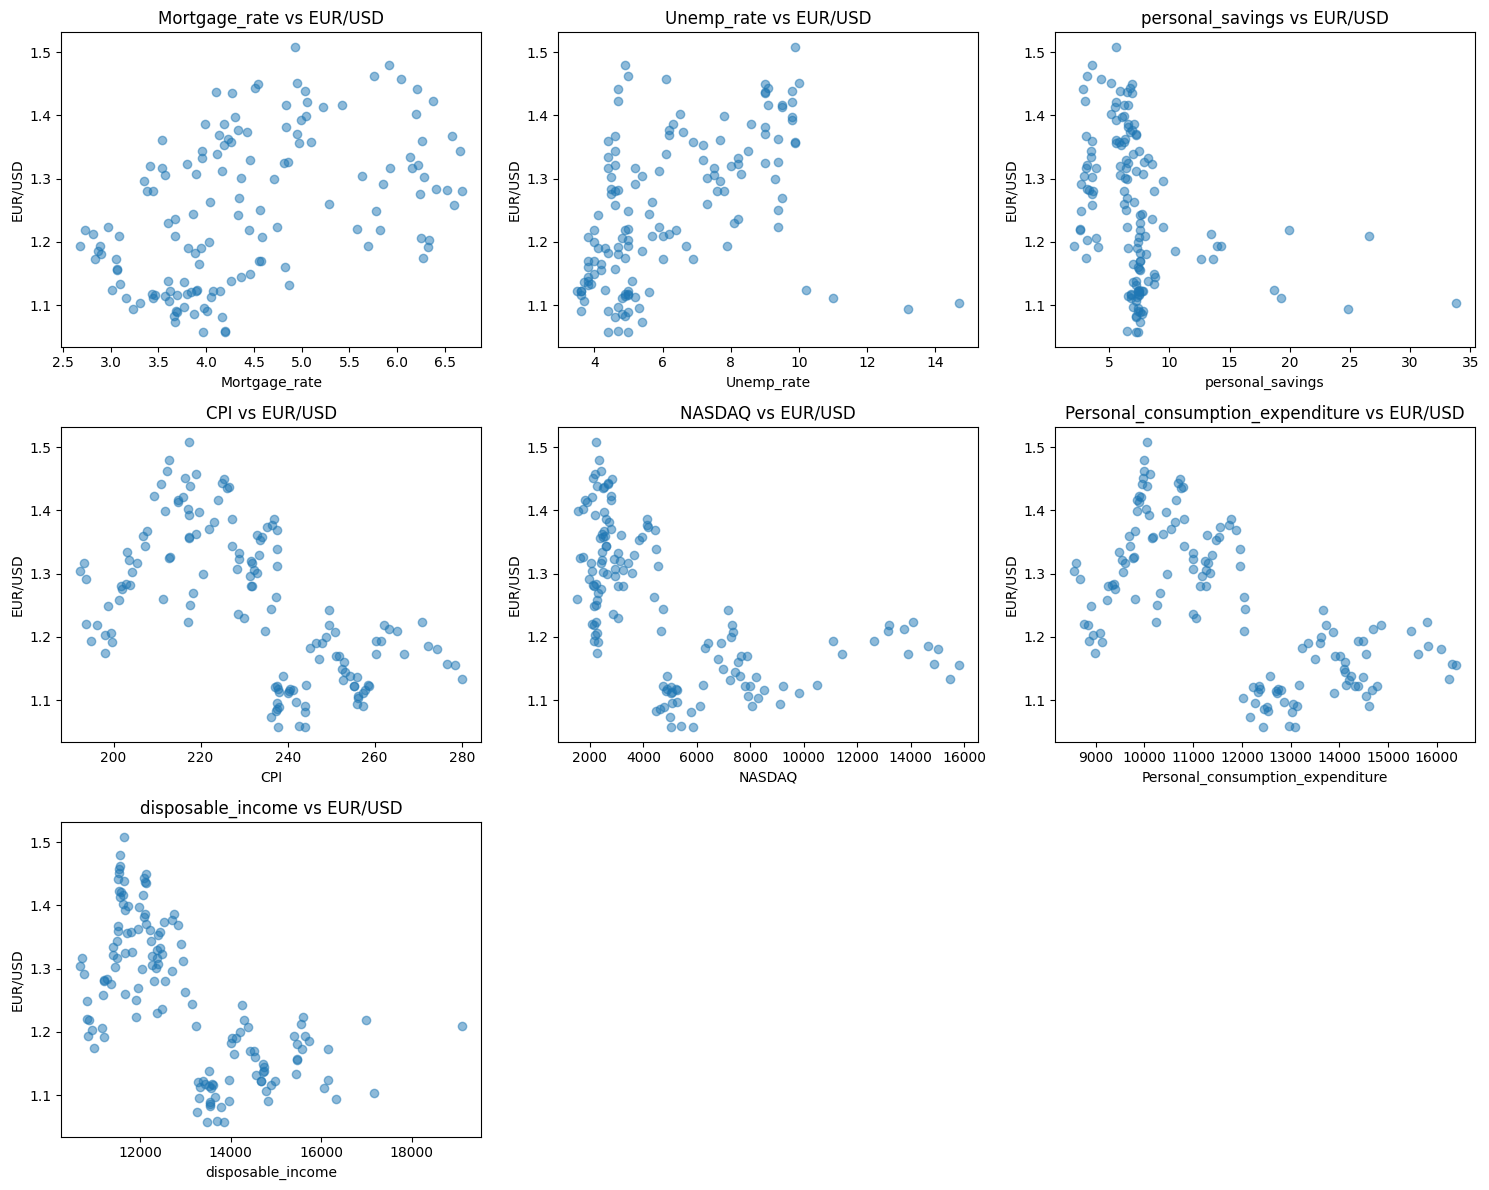

In [10]:
# Define indicators to compare with EUR/USD
indicators = [
    "Mortgage_rate", "Unemp_rate", "personal_savings",
    "CPI", "NASDAQ", "Personal_consumption_expenditure", "disposable_income"
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust grid size based on the number of indicators
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each indicator and create a scatter plot
for i, indicator in enumerate(indicators):
    ax = axes[i]
    ax.scatter(df_combined[indicator], df_combined["EUR/USD"], alpha=0.5)
    ax.set_xlabel(indicator)
    ax.set_ylabel("EUR/USD")
    ax.set_title(f"{indicator} vs EUR/USD")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### **Data Interpretation & Findings**

Macroeconomic indicators play a crucial role in influencing the movement of currency pairs, including EUR/USD. By analyzing the correlation between EUR/USD and various economic variables, we can identify key relationships that drive exchange rate fluctuations.

| **Indicator** | **Correlation with EUR/USD** | **Meaning** |
|--------------|-----------------------------|------------|
| **Mortgage Rate** | **0.461** | Moderate positive correlation: Higher mortgage rates tend to be associated with a stronger EUR/USD. |
| **Unemployment Rate** | **0.451** | Moderate positive correlation: Higher unemployment is linked to EUR/USD increasing. |
| **Personal Savings** | **-0.350** | Weak negative correlation: Higher savings are slightly linked to a weaker EUR/USD. |
| **CPI (Inflation)** | **-0.552** | Moderate negative correlation: Higher inflation is associated with a weaker EUR/USD. |
| **NASDAQ Index** | **-0.555** | Moderate negative correlation: As NASDAQ rises, EUR/USD tends to weaken. |
| **Personal Consumption Expenditure (PCE)** | **-0.621** | Strong negative correlation: Higher consumer spending weakens EUR/USD. |
| **Disposable Income** | **-0.626** | Strong negative correlation: More disposable income is linked to a weaker EUR/USD. |

EUR/USD exhibits a positive correlation with mortgage rates (0.461281) and unemployment rates (0.450759), meaning that when borrowing costs or joblessness rise, EUR/USD tends to increase. On the other hand, EUR/USD has a negative correlation with personal savings (-0.350090), CPI (-0.552154), NASDAQ (-0.555013), personal consumption expenditure (-0.621238), and disposable income (-0.626208). This suggests that when these economic indicators improve, EUR/USD generally declines. The strong negative correlation with CPI (-0.552154) indicates that higher inflation is associated with a stronger USD, leading to a lower EUR/USD. Additionally, the NASDAQ’s negative correlation (-0.555013) with EUR/USD implies that when the U.S. stock market performs well, capital inflows strengthen the USD, causing EUR/USD to fall. The strongest negative correlations are observed with personal consumption expenditure (-0.621238) and disposable income (-0.626208), suggesting that rising consumer spending and income contribute significantly to USD strength.

Higher mortgage rates and unemployment rates can signal economic slowdown, leading to expectations of looser U.S. monetary policy. This could weaken the USD and increase EUR/USD. Meanwhile, rising inflation (CPI) strengthens the USD, likely due to the Federal Reserve implementing interest rate hikes to control inflation. These rate hikes make USD-denominated assets more attractive to investors, causing EUR/USD to decline. Similarly, a booming stock market (NASDAQ) is often associated with USD strength, as higher investor confidence leads to increased capital inflows into U.S. assets, pushing EUR/USD lower. Furthermore, increased personal consumption expenditure and disposable income indicate strong economic activity, leading to a stronger USD and a declining EUR/USD. Lower personal savings rates may also indicate higher consumer spending, which supports economic expansion and contributes to USD appreciation.

The analysis highlights that EUR/USD movement is closely tied to the strength of the U.S. economy, with inflation, consumer spending, and investment playing crucial roles in USD valuation. When economic indicators such as consumer spending, disposable income, and stock market growth improve, the USD strengthens, causing EUR/USD to decline. Conversely, signs of economic weakness, such as rising unemployment or higher mortgage rates, often lead to a weaker USD and an increase in EUR/USD. The Federal Reserve’s interest rate policies are a key determinant of these trends, as they influence inflation control, capital flows, and overall economic performance. Forex traders and analysts should closely monitor macroeconomic trends, as shifts in inflation, employment, and financial markets can provide insights into USD strength and EUR/USD movements. Additionally, incorporating external factors such as geopolitical risks, trade policies, and central bank interventions could further refine the understanding of EUR/USD dynamics.

#### **Key Observations**
- EUR/USD shows a positive correlation with mortgage rates (0.461281) and unemployment rates (0.450759), indicating that when borrowing costs or joblessness rise, EUR/USD tends to increase.
- EUR/USD has a negative correlation with personal savings (-0.350090), CPI (-0.552154), NASDAQ (-0.555013), personal consumption expenditure (-0.621238), and disposable income (-0.626208), meaning that as these economic indicators improve, EUR/USD tends to decline.
- A strong negative correlation with CPI (-0.552154) suggests that higher inflation is associated with a stronger USD, leading to a lower EUR/USD.
- The NASDAQ's negative correlation (-0.555013) with EUR/USD indicates that when the U.S. stock market performs well, the USD strengthens, causing EUR/USD to fall.
- Personal consumption expenditure and disposable income show the strongest negative correlations (-0.621238 and -0.626208, respectively), implying that rising consumer spending and income contribute significantly to USD strength.
  
#### **Data Interpretation**
- Higher mortgage rates and unemployment rates can signal economic slowdown, potentially leading to expectations of looser monetary policy, weakening the USD and increasing EUR/USD.
- Rising inflation (CPI) strengthens the USD, likely due to the Federal Reserve implementing interest rate hikes to combat inflation, which attracts investors to USD-denominated assets and lowers EUR/USD.
- A booming stock market (NASDAQ) often correlates with USD strength, as higher investor confidence leads to increased capital inflows into U.S. assets, pushing EUR/USD lower.
- Higher personal consumption expenditure and disposable income drive economic growth, strengthening the USD and contributing to a declining EUR/USD.
- Lower personal savings rates may indicate higher consumer spending, which supports economic expansion and leads to a stronger USD, pushing EUR/USD downward.
  
#### **Insights & Conclusion**
- EUR/USD movement is closely tied to the strength of the U.S. economy, with inflation, spending, and investment playing key roles in USD valuation.
- Stronger economic indicators (higher spending, income, and stock market growth) lead to USD appreciation, causing EUR/USD to decline, while economic weakness (higher unemployment and borrowing costs) weakens the USD, increasing EUR/USD.
- Federal Reserve policies, particularly interest rate decisions, play a crucial role in determining EUR/USD trends, as they influence inflation, investment flows, and overall economic conditions.
- Monitoring macroeconomic trends is essential for forex traders, as shifts in inflation, employment, and market performance can signal changes in USD strength and EUR/USD movement.
- Further analysis incorporating external factors such as geopolitical events, trade policies, and central bank interventions could refine the understanding of EUR/USD dynamics.


<br><br>



## **V. PRICE FORECASTING USING MACHINE LEARNING**

To test if forecasting forex price using the macroeconomic data is possible. We split the data into training and testing set and apply multiple machine learning models including:
- Linear Regression assumes a linear relationship between the input features and the target variable. It finds the best-fitting line by minimizing the difference between predicted and actual values. While simple and interpretable, it struggles with complex, non-linear patterns.
- Random Forest Regressor is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. It handles non-linearity well and is robust to noise but can be slower due to its many trees.
- Gradient Boosting Regressor (GBR) builds trees sequentially, with each new tree correcting the errors of the previous ones. This boosting technique enhances accuracy but can be computationally expensive. It is widely used for structured data prediction.
- XGBoost Regressor is an optimized version of Gradient Boosting that improves speed and efficiency with advanced regularization techniques. It is highly popular in machine learning competitions due to its strong predictive performance.
- Support Vector Regressor (SVR) uses support vector machines to fit data within a defined margin. With an RBF kernel, it captures non-linear relationships well but is sensitive to parameter tuning and less scalable for large datasets.
- K-Nearest Neighbors (KNN) Regressor predicts a value based on the average of the k closest points. It is simple and effective for small datasets but struggles with high-dimensional data and large datasets due to computational complexity.

The models are tested using both random train-test split and time-based train-test split. Testing using both splitting model is crucial for evaluating their real-world performance, especially for time series forecasting.

Random Train-Test Split (e.g., train_test_split(X, y, test_size=0.2, random_state=42)) randomly shuffles data before splitting. This helps assess general model performance when past and future data points are mixed. Models like Random Forest, XGBoost, and KNN, which do not explicitly consider time dependencies, may perform better under this approach because they can leverage patterns across the entire dataset. However, this method can introduce data leakage in time series problems, as future data may unintentionally influence past predictions.

Time-Based Train-Test Split maintains chronological order, using older data for training and newer data for testing. This better reflects real-world scenarios where past values predict future outcomes. Models such as Gradient Boosting and SVR, which rely on patterns learned over time, are better evaluated using this method. However, since the model only learns from past data, it may struggle with sudden changes in trends or unseen conditions.

By testing with both methods, we can determine whether a model's good performance is due to genuine predictive power or artificial advantages from random shuffling. If a model performs well with a random split but poorly with a time-based split, it may not generalize well for future predictions.


<br>

### **Testing and building machine learning model**

#### **Shift the target variable backward by one month**

In [11]:
# Ensure data is sorted chronologically
df_combined = df_combined.sort_index()

# Create lag features for EUR/USD (e.g., last 6 months)
for lag in range(1, 7):  
    df_combined[f"EUR/USD_lag_{lag}"] = df_combined["EUR/USD"].shift(lag)
    
# Shift target variable to predict next month's EUR/USD price
df_combined["EUR/USD_next_month"] = df_combined["EUR/USD"].shift(-1)

# Drop the last row (since it now has a NaN target)
df_combined = df_combined.dropna()

#### **Split the data by features and target and train multiple models (train-test split)**

In [12]:
# Define features (X) and target (y)
X = df_combined.drop(columns=["EUR/USD_next_month"])
y = df_combined["EUR/USD_next_month"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR(kernel="rbf", C=100, gamma=0.1),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 50)


Model: Linear Regression
  Mean Absolute Error (MAE): 0.0298
  Root Mean Squared Error (RMSE): 0.0408
  R² Score: 0.8861
--------------------------------------------------
Model: Random Forest Regressor
  Mean Absolute Error (MAE): 0.0293
  Root Mean Squared Error (RMSE): 0.0369
  R² Score: 0.9067
--------------------------------------------------
Model: Gradient Boosting Regressor
  Mean Absolute Error (MAE): 0.0296
  Root Mean Squared Error (RMSE): 0.0370
  R² Score: 0.9062
--------------------------------------------------
Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.1063
  Root Mean Squared Error (RMSE): 0.1213
  R² Score: -0.0077
--------------------------------------------------
Model: XGBoost Regressor
  Mean Absolute Error (MAE): 0.0306
  Root Mean Squared Error (RMSE): 0.0422
  R² Score: 0.8778
--------------------------------------------------
Model: KNN Regressor
  Mean Absolute Error (MAE): 0.0333
  Root Mean Squared Error (RMSE): 0.0440
  R² Score: 0.8673

#### **Actual vs. Predicted plot for each models (train-test split)**

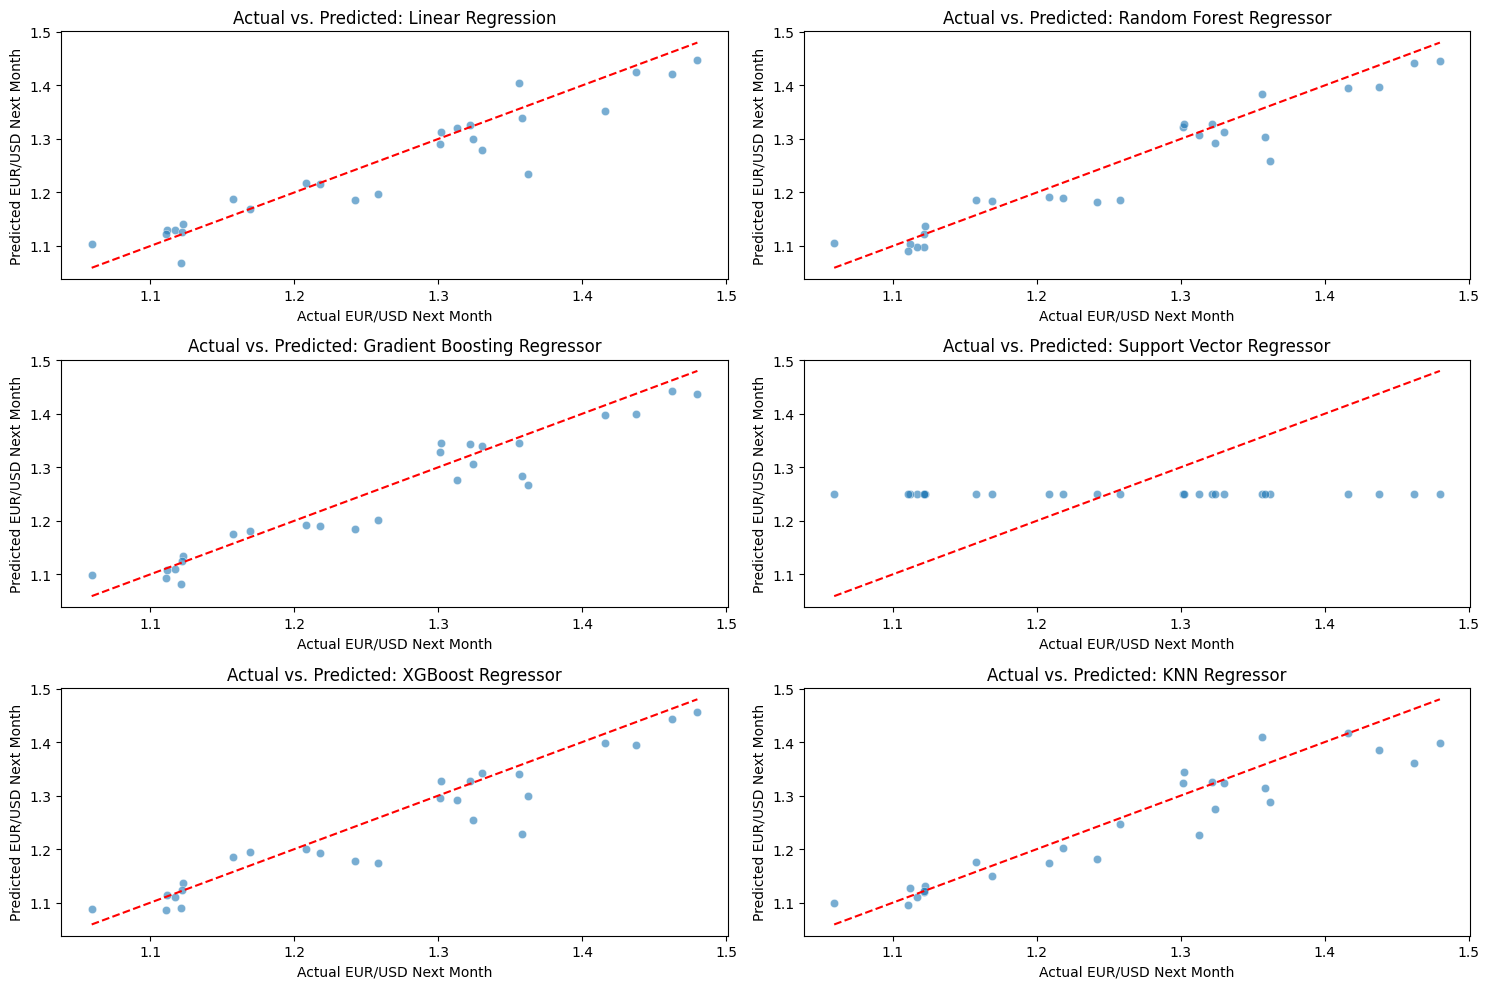

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for all models
y_preds = {name: model.predict(X_test) for name, model in models.items()}

# Plot Actual vs. Predicted for each model
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')  # Perfect prediction line
    plt.xlabel("Actual EUR/USD Next Month")
    plt.ylabel("Predicted EUR/USD Next Month")
    plt.title(f"Actual vs. Predicted: {name}")

plt.tight_layout()
plt.show()


#### **Split the data by features and target and train multiple models (time-based train-test split)**

In [14]:
# Define features (X) and target (y)
X = df_combined.drop(columns=["EUR/USD_next_month"])
y = df_combined["EUR/USD_next_month"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use a time-based train-test split
train_size = int(len(df_combined) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR(kernel="rbf", C=100, gamma=0.1),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 50)


Model: Linear Regression
  Mean Absolute Error (MAE): 0.0648
  Root Mean Squared Error (RMSE): 0.1117
  R² Score: -6.8002
--------------------------------------------------
Model: Random Forest Regressor
  Mean Absolute Error (MAE): 0.0246
  Root Mean Squared Error (RMSE): 0.0328
  R² Score: 0.3285
--------------------------------------------------
Model: Gradient Boosting Regressor
  Mean Absolute Error (MAE): 0.0217
  Root Mean Squared Error (RMSE): 0.0297
  R² Score: 0.4482
--------------------------------------------------
Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.1097
  Root Mean Squared Error (RMSE): 0.1167
  R² Score: -7.5184
--------------------------------------------------
Model: XGBoost Regressor
  Mean Absolute Error (MAE): 0.0233
  Root Mean Squared Error (RMSE): 0.0300
  R² Score: 0.4382
--------------------------------------------------
Model: KNN Regressor
  Mean Absolute Error (MAE): 0.0372
  Root Mean Squared Error (RMSE): 0.0419
  R² Score: -0.09

#### **Actual vs. Predicted plot for each models (time-based train-test split)**

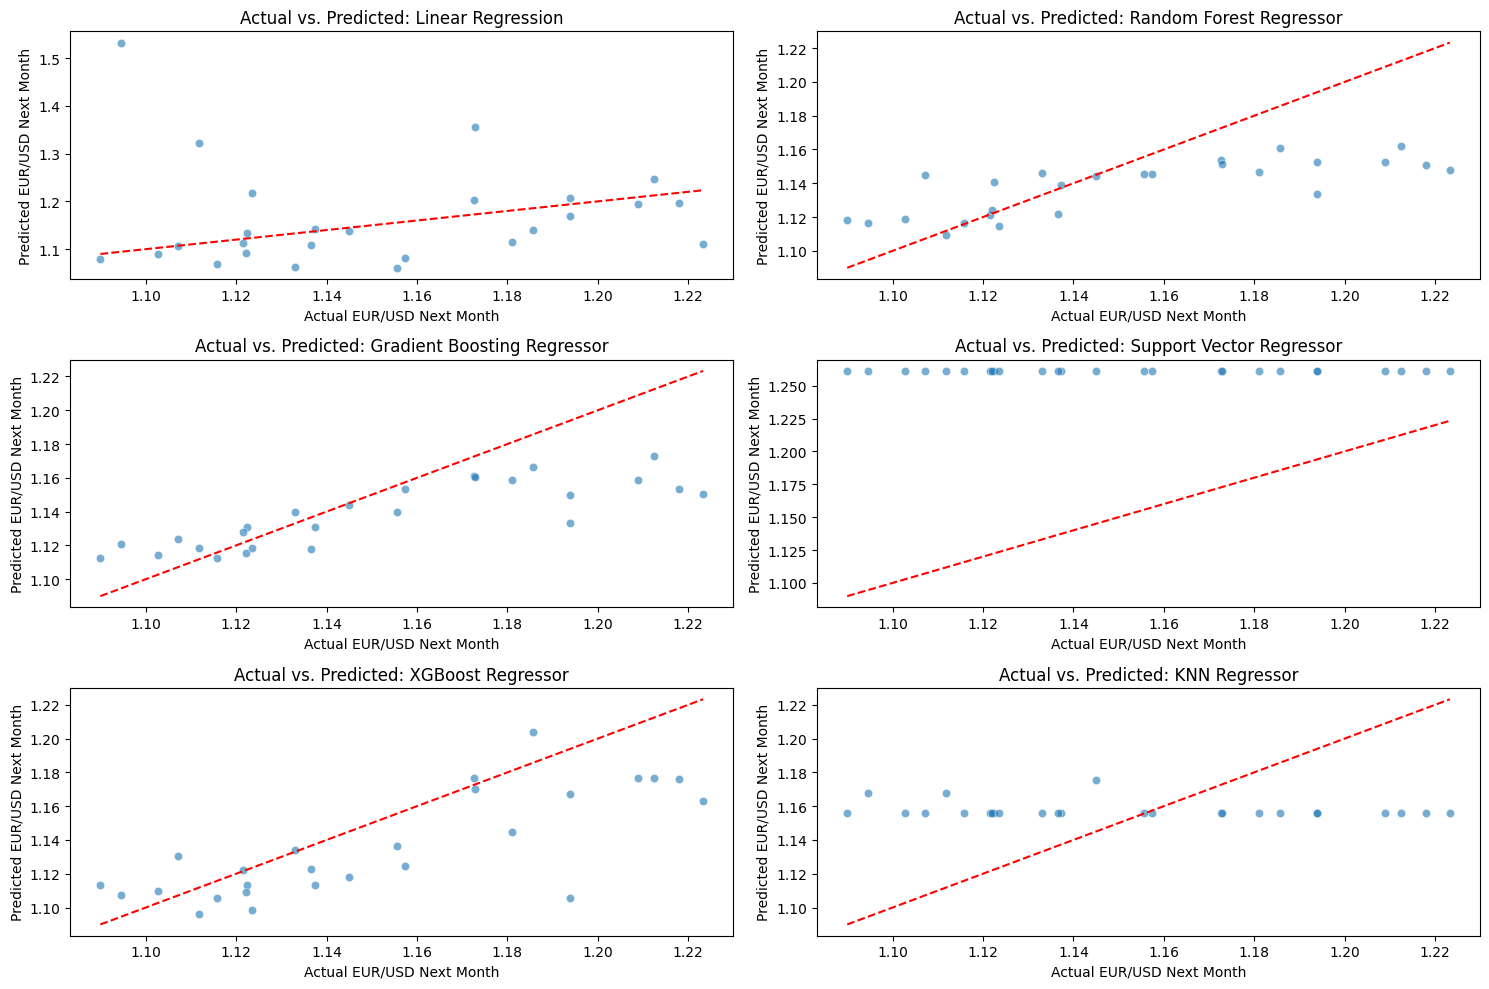

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for all models
y_preds = {name: model.predict(X_test) for name, model in models.items()}

# Plot Actual vs. Predicted for each model
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')  # Perfect prediction line
    plt.xlabel("Actual EUR/USD Next Month")
    plt.ylabel("Predicted EUR/USD Next Month")
    plt.title(f"Actual vs. Predicted: {name}")

plt.tight_layout()
plt.show()


### **Results**

#### **Differences Between Train-Test Split and Time-Based Split**
The model performance varied significantly between the random train-test split and the time-based train-test split, which is expected in financial time series forecasting.

In the random train-test split, the data is shuffled before splitting, meaning that both the training and testing sets contain a mix of past and future observations. This allows models to learn patterns effectively since they can see a broad representation of market conditions across different time periods. As a result, models like Random Forest, Gradient Boosting, and XGBoost performed well, achieving R² scores above 0.87, indicating strong predictive power when tested on randomly distributed data.

However, in the time-based train-test split, the training set consists of past data while the test set consists of future unseen data, mimicking real-world forecasting scenarios where we use historical data to predict future movements. Here, the performance of all models dropped drastically, with Linear Regression and Support Vector Regressor (SVR) showing extremely poor results (R² < -6.8 and -7.5, respectively). Even the strongest models in the random split (Gradient Boosting and XGBoost) saw their R² scores drop to around 0.44, highlighting the difficulty of predicting currency prices over time.

The key takeaway is that models may appear to perform well in a randomly shuffled dataset but struggle to generalize when faced with real-world sequential forecasting problems. This discrepancy suggests that machine learning models trained without considering time dependencies risk overfitting to historical patterns that do not hold in future market conditions.



#### **Performance Breakdown by Model**
- Linear Regression performed exceptionally well in the random split (R² = 0.8861, RMSE = 0.0408) but performed terribly in the time-based split (R² = -6.8002, RMSE = 0.1117). This suggests that while linear models can capture historical relationships well in a mixed dataset, they fail to extrapolate these relationships into the future. One major reason for this could be that currency movements are non-linear and influenced by many unpredictable factors, making simple linear assumptions inadequate for time series forecasting.

- Random Forest Regressor had strong results in the random split (R² = 0.9067, RMSE = 0.0369) but dropped significantly in the time-based split (R² = 0.3285, RMSE = 0.0328). This suggests that while Random Forest is effective at capturing relationships between input variables and the target, it does not handle time-dependent trends well. This happens because Random Forest treats each data point independently, ignoring the sequential nature of time series data.

- Gradient Boosting Regressor was one of the best models in both scenarios, achieving R² = 0.9062 in the random split and still managing a decent R² = 0.4482 in the time split. The reason why Gradient Boosting did relatively well in the time-based split is that boosting techniques sequentially refine predictions, which helps capture some complex relationships in macroeconomic data. However, the drop in performance still highlights the difficulty of making long-term predictions in currency markets.

- Support Vector Regressor (SVR) performed terribly in both cases, with negative R² values (-0.0077 in the random split and -7.5184 in the time split), indicating that it completely failed to model the data. This suggests that SVR is not well suited for this type of problem, possibly because its kernel-based approach struggles with the high volatility and non-stationary nature of currency exchange rates.

- XGBoost Regressor performed similarly to Gradient Boosting, with R² = 0.8778 in the random split and R² = 0.4382 in the time-based split. Like Gradient Boosting, XGBoost learns patterns incrementally, reducing error step by step, which makes it a strong contender for predictive modeling. However, the fact that R² dropped by more than half in the time-based split suggests that even sophisticated boosting models struggle with long-term forecasting of financial time series.

- KNN Regressor had the worst results among non-SVR models, with R² = 0.8673 in the random split but dropping to -0.0983 in the time-based split. KNN works by finding the most similar past data points to make predictions, but this technique does not work well for time series forecasting. The poor performance indicates that historical similarity is not a reliable predictor of future exchange rates due to the dynamic nature of the forex market.

#### **Can Machine Learning Models Accurately Predict Next-Month EUR/USD Prices Using Macroeconomic Data?**
Based on these results, the answer is no—at least not reliably. While models can detect historical correlations between macroeconomic indicators and EUR/USD exchange rates, their ability to generalize for future price movements is weak. There are several key reasons why machine learning struggles with this problem:

- Macroeconomic Data Alone is Not Enough.
Macroeconomic indicators like GDP, interest rates, and inflation influence currency exchange rates, but many other unpredictable factors also play a role. Central bank policies, geopolitical events, unexpected economic crises, and even market sentiment can cause sudden price shifts that historical macroeconomic data cannot predict.

- Market Behavior is Non-Stationary.
Currency markets are non-stationary, meaning that patterns change over time. A relationship that existed in the past may not hold in the future due to changing economic conditions. Traditional machine learning models struggle with this because they assume past patterns will continue, which is not always true in finance.

- Better Models May Be Needed.
The models tested here (Random Forest, Gradient Boosting, XGBoost, etc.) are not specifically designed for time series forecasting. More specialized models like Long Short-Term Memory (LSTM) networks, ARIMA, or Prophet may handle sequential data better by explicitly modeling time dependencies.

- Feature Engineering Could Improve Performance.
Instead of using only raw macroeconomic indicators, additional features like moving averages, volatility measures, momentum indicators, and sentiment analysis from news or social media could improve prediction accuracy. By incorporating technical and sentiment-based features, the model might be able to capture short-term price movements better.

While machine learning models can learn historical patterns, accurately predicting next-month EUR/USD prices remains a highly challenging task due to the complexity of the forex market. Random train-test splits give misleadingly high accuracy, while time-based splits reveal the true difficulty of forecasting currency movements. To improve results, researchers should explore advanced time series models, use a combination of fundamental and technical indicators, and incorporate real-time sentiment analysis to capture sudden market shifts. However, due to the inherently unpredictable nature of financial markets, achieving consistent, highly accurate long-term forecasts remains an open challenge.

## **V. SUMMARY & CONCLUSION**

### **Conclusion**

This project provides a comprehensive analysis of the historical correlations between EUR/USD and GBP/USD, the interactions between macroeconomic indicators, and the relationship between these indicators and forex price movements. Our findings confirm that EUR/USD and GBP/USD exhibit a strong positive correlation of approximately 0.75, indicating that both pairs tend to move in the same direction in response to external economic conditions. However, GBP/USD displays greater volatility due to factors such as political events and Brexit-related uncertainties.

Macroeconomic indicators demonstrate intricate relationships, with inflation and interest rates showing an inverse correlation, while GDP growth and unemployment maintain a negative correlation. These dynamics align with economic theories such as Okun's Law and central bank monetary policy principles. Our analysis further reveals that EUR/USD movements are closely tied to key economic indicators such as CPI, personal consumption expenditure, and disposable income, highlighting the role of consumer behavior and inflation control in forex valuation.

The application of machine learning models to predict EUR/USD movements yielded varying results depending on the chosen data splitting method. A random train-test split resulted in artificially inflated accuracy, whereas a time-based split provided more realistic yet lower predictive power. This emphasizes the importance of using time-sensitive validation methods when dealing with financial data.

Overall, the project underscores the complexity of forex market dynamics, where macroeconomic indicators, central bank policies, and market sentiment collectively influence currency movements. While strong correlations exist between certain variables, external shocks such as geopolitical events and unexpected economic crises can disrupt historical patterns, necessitating continuous monitoring and adaptation of analytical models.

### **Key Takeaways**
- EUR/USD and GBP/USD share a strong positive correlation of 0.75, meaning both pairs often move together due to USD-driven market conditions.
- Macroeconomic indicators are highly interdependent, with interest rate adjustments having a lagging effect on inflation and GDP growth.
- Inflation (CPI) and interest rates exhibit a strong inverse relationship, reinforcing central bank strategies of rate hikes to combat inflation.
- EUR/USD has a negative correlation with NASDAQ (-0.555013), personal consumption expenditure (-0.621238), and disposable income (-0.626208), indicating that a strong U.S. economy strengthens the USD, leading to a decline in EUR/USD.
- Forex traders and policymakers must carefully analyze economic data and central bank actions, as monetary policies significantly impact currency valuation.
- Machine learning models for forex prediction must consider the importance of time-based data splitting to avoid overfitting and misleading accuracy levels.

### **Future improvement**
- Incorporating Sentiment Analysis: Future research could integrate market sentiment indicators such as news sentiment and social media data to enhance predictive models.
- Exploring Additional Macroeconomic Factors: Expanding the dataset to include trade balances, government debt levels, and consumer confidence indices could improve the understanding of forex movements.
- Enhancing Machine Learning Models: Implementing advanced models such as Long Short-Term Memory (LSTM) networks or Transformer-based architectures could improve predictive accuracy for time-series forecasting.
- Real-Time Data Integration: A live dashboard that updates forex trends in real-time using macroeconomic data feeds could provide more actionable insights for traders and analysts.
- Geopolitical Risk Analysis: Incorporating geopolitical risk indices could refine forecasts by accounting for external shocks that disrupt historical correlations.

### **Closing Words**

The forex market remains a dynamic and multifaceted financial space where macroeconomic fundamentals, central bank policies, and market sentiment interact in complex ways. This research has provided valuable insights into how EUR/USD and GBP/USD move in relation to macroeconomic indicators, reinforcing the importance of economic data in currency valuation. While correlations and historical trends offer useful guidance, the unpredictability of external events requires traders, analysts, and policymakers to remain agile and continuously adapt to new information. Future studies incorporating advanced modeling techniques and real-time data analysis will further enhance our understanding of forex market dynamics, providing more robust frameworks for decision-making in the evolving global economy. I acknowledge that I am still inexperienced in this field and that there may be mistakes or limitations in this study. I sincerely apologize for any errors and welcome constructive feedback to refine my analysis. I hope this study contributes to a deeper appreciation of the complex dynamics of forex trading and macroeconomics.